In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\PYTHON\Datasets\Logistic regression\Affairs.csv")
df.head()

,Unnamed: 0,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,4,0,male,37.0,10.00,no,3,18,7,4
1,5,0,female,27.0,4.00,no,4,14,6,4
2,11,0,female,32.0,15.00,yes,1,12,1,4
3,16,0,male,57.0,15.00,yes,5,18,6,5
4,23,0,male,22.0,0.75,no,2,17,6,3


In [3]:
df.shape

(601, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     601 non-null    int64  
 1   affairs        601 non-null    int64  
 2   gender         601 non-null    object 
 3   age            601 non-null    float64
 4   yearsmarried   601 non-null    float64
 5   children       601 non-null    object 
 6   religiousness  601 non-null    int64  
 7   education      601 non-null    int64  
 8   occupation     601 non-null    int64  
 9   rating         601 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 47.1+ KB


In [5]:
df = df.drop(columns=['Unnamed: 0'],axis=1)
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [15]:
df.isnull().sum()

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

In [13]:
for i in df.columns:
    print(i,df[i].unique())

affairs [ 0  3  7 12  1  2]
gender [0 1]
age [37.  27.  32.  57.  22.  47.  42.  52.  17.5]
yearsmarried [10.     4.    15.     0.75   1.5    7.     0.417  0.125]
children [0 1]
religiousness [3 4 1 5 2]
education [18 14 12 17 16 20  9]
occupation [7 6 1 5 4 3 2]
rating [4 5 3 2 1]


In [7]:
df.gender = df.gender.map({'male':0,'female':1})
df.children = df.children.map({'no':0,'yes':1})
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,0,37.0,10.00,0,3,18,7,4
1,0,1,27.0,4.00,0,4,14,6,4
2,0,1,32.0,15.00,1,1,12,1,4
3,0,0,57.0,15.00,1,5,18,6,5
4,0,0,22.0,0.75,0,2,17,6,3


In [16]:
df.affairs = np.where(df['affairs']>0,1,0)
df.tail()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
596,1,0,22.0,1.5,1,1,12,2,5
597,1,1,32.0,10.0,1,2,18,5,4
598,1,0,32.0,10.0,1,2,17,6,5
599,1,0,22.0,7.0,1,3,18,6,2
600,1,1,32.0,15.0,1,3,14,1,5


In [17]:
df.affairs.unique()

array([0, 1])

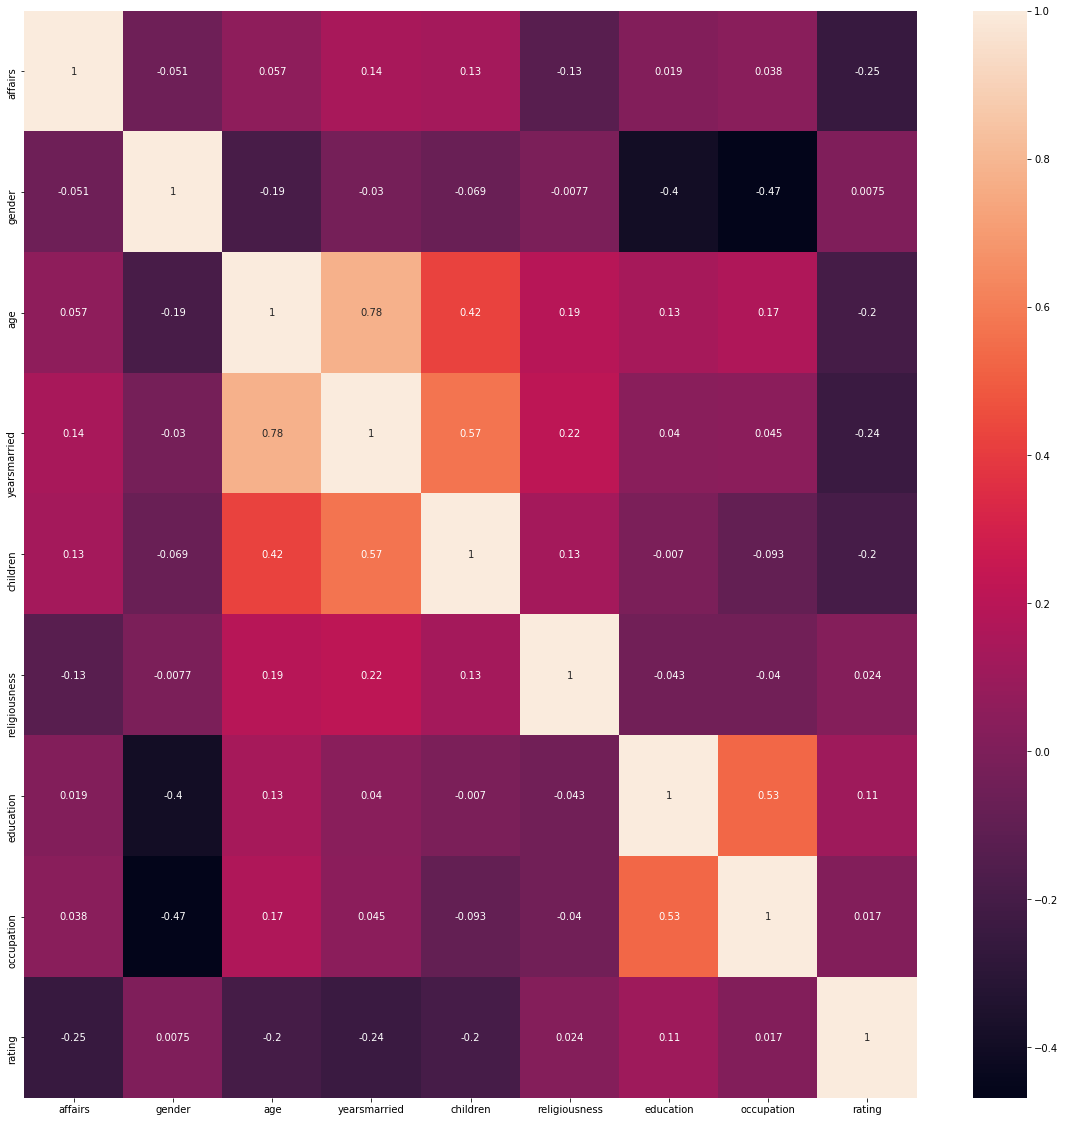

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [41]:
df.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [50]:
req_col = ['age', 'yearsmarried', 'religiousness',
       'education', 'occupation', 'rating']

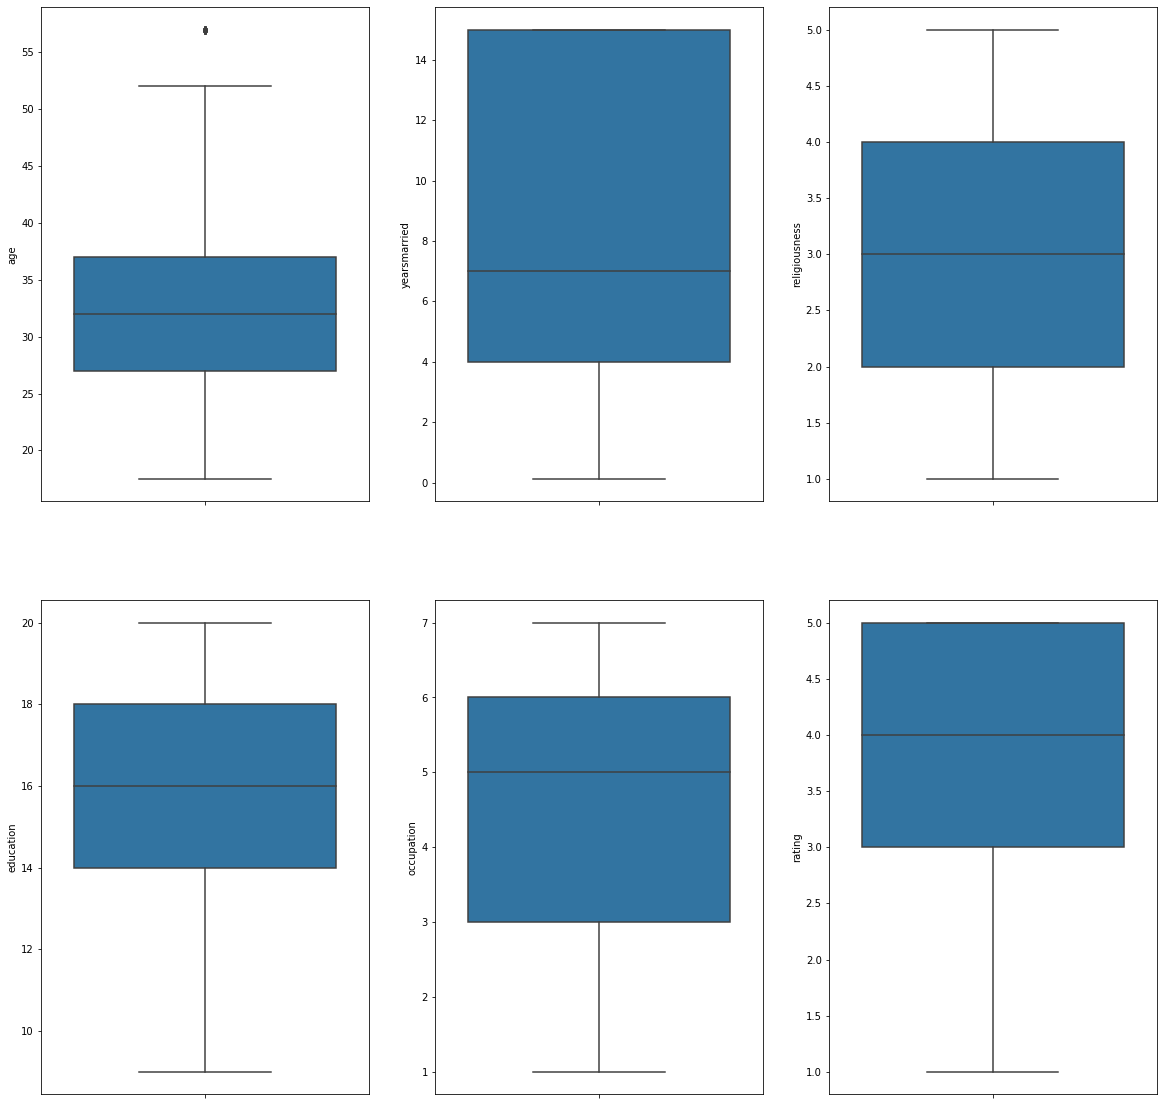

In [51]:
plt.figure(figsize=(20,20))
for i,v in enumerate(req_col):
    plt.subplot(2,3,i+1)
    fig = sns.boxplot(y=df[v])

plt.show()

In [55]:
x = df.drop(columns='affairs',axis=1)
y = df['affairs']

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =10)

In [60]:
X_train.shape,X_test.shape

((420, 8), (181, 8))

In [65]:
from sklearn.linear_model import LogisticRegression
log_class = LogisticRegression(max_iter=1000)

In [66]:
log_class.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred = log_class.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [75]:
from sklearn.metrics import accuracy_score,classification_report

In [71]:
accuracy_score(y_test,y_pred)

0.8011049723756906

In [72]:
y_test.value_counts()

0    141
1     40
Name: affairs, dtype: int64

In [74]:
null_accuracy = 141/(141+40)
null_accuracy

0.7790055248618785

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       141
           1       0.67      0.20      0.31        40

    accuracy                           0.80       181
   macro avg       0.74      0.59      0.60       181
weighted avg       0.78      0.80      0.76       181

